## Función Logística Estándar
#### 

$$y=mx+b$$

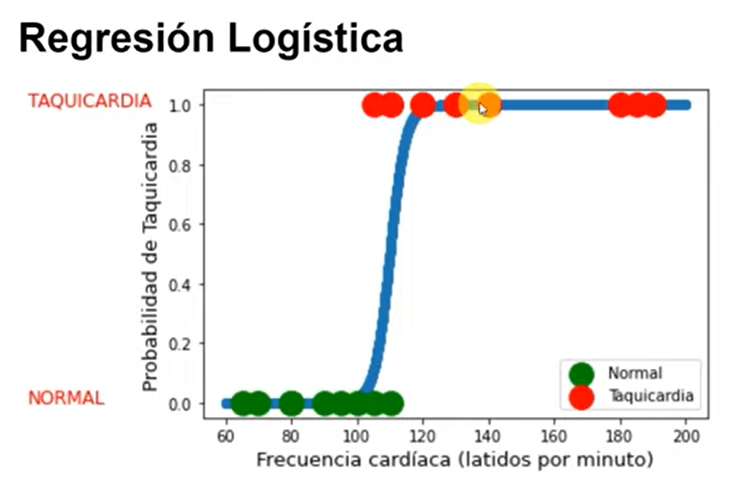

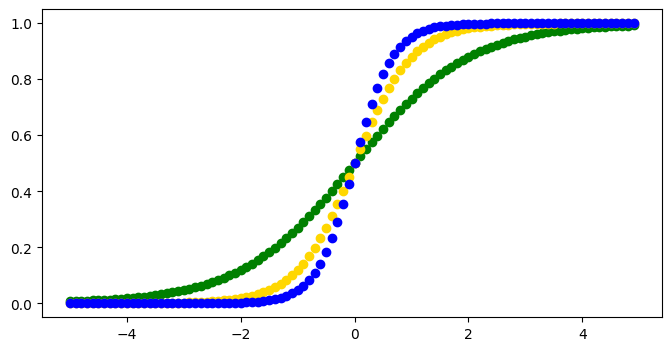

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Creamos una función logística vectorial (ufuncs) calcula la probabilidad
logistica = np.frompyfunc(lambda b0, b1, x:
                         1 / (1 + math.exp(-(b0 + b1*x))),
                         3, 1) #Recibe 3 parametros 1 salida

# Graficamos la función logística
plt.figure(figsize=(8,4))

# Diferencia pendientes
plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 1, np.arange(-5, 5, 0.1)), color="green"
            )

plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 2, np.arange(-5, 5, 0.1)), color="gold"
            )

plt.scatter(np.arange(-5, 5, 0.1),
            logistica(0, 3, np.arange(-5, 5, 0.1)), color="blue"
            )

Vemos que cada una tiene una inclinación  
Nos sirve para ajustar los parametros de entrada en el modelo de regresión logistica  
esto directamente relacionado con nuestro algoritmo de obtimización con el que creamos nuestro modelo de regresión logista  
de modo que podemos clasificar lo mejor posible a los individuos   
en este caso individuos con taquicardia  

# Taquicardia: Probabilidad y Clase

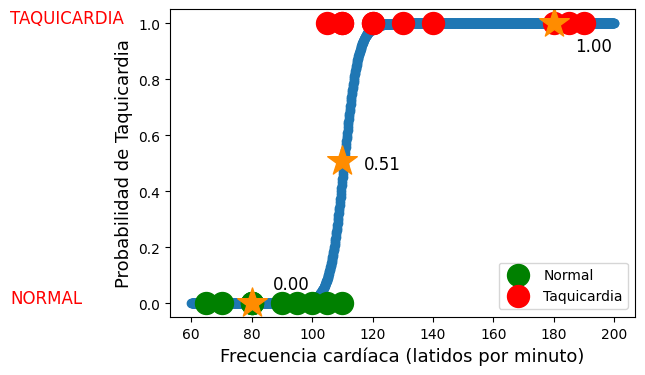

In [22]:
# Persona Normal de 60 a 100 latidos por minuto.
# Persona con Taquicardia de hasta 220 latidos por minuto.
personas_normal = [65, 70, 80, 80, 80,
                   90, 95, 100, 105, 110]

personas_taquicardia = [105, 110, 110, 120, 120,
                        130, 140, 180, 185, 190]

# Graficamos una función logística
plt.figure(figsize=(6, 4))

# y = b0 + b1x    
#
# y = -46.68057196 + 0.42460226x (representa la pendiente)

plt.scatter(np.arange(60, 200, 0.1), 
            logistica(-46.68057196, 0.4222460226,
                      np.arange(60, 200, 0.1)))  

# Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal")    
plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")    

# Graficamos las probabilidades para tres (3) individuos
individuos = [80, 110, 180]

probalidades = logistica(-46.68057196, 0.42460226, individuos)

plt.scatter(individuos, probalidades,
            marker="*", c="darkorange", s=500)

plt.text(individuos[0]+7, 0.05, "%0.2f" % probalidades[0],
         size=12, color="black")
plt.text(individuos[1]+7, 0.48, "%0.2f" % probalidades[1],
         size=12, color="black")
plt.text(individuos[2]+7, 0.90, "%0.2f" % probalidades[2],
         size=12, color="black")
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")
plt.text(0, 0, "NORMAL", size=12, color="red")
plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)
plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

Función de regresión logística
$$y=b_0+b_{1}x$$
$$y = -46.68057196 + 0.42460226x$$
(x representa la pendiente)

# Máxima Verosimilitud

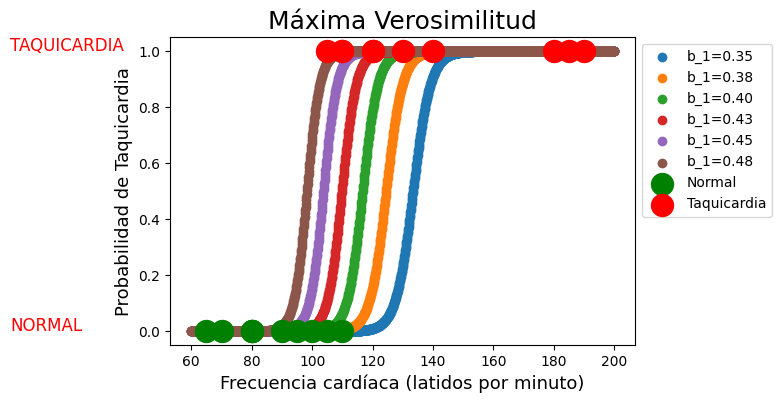

In [23]:
# Diferentes funciones logísticas con diferentes "pendientes"
plt.figure(figsize=(6, 4))

for b1 in np.arange(0.35, 0.49, 0.025):
    plt.scatter(np.arange(60, 200, 0.1), 
                logistica(-46.68057196,
                          b1,
                          np.arange(60, 200, 0.1)),
                label="b_1=%0.2f" % b1)  
   
# Graficamos la frecuencia cardíaca de las personas 
plt.scatter(personas_normal, [0]*10, 
            marker="o", c="green", s=250, label="Normal")    
plt.scatter(personas_taquicardia, [1]*10, 
            marker="o", c="red", s=250, label="Taquicardia")     

plt.title("Máxima Verosimilitud", fontsize=18.0)
plt.text(0, 1, "TAQUICARDIA", size=12, color="red")
plt.text(0, 0, "NORMAL", size=12, color="red")
plt.ylabel("Probabilidad de Taquicardia", fontsize=13.0)
plt.xlabel("Frecuencia cardíaca (latidos por minuto)", fontsize=13.0)
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

# Modelo de Regresión Logística

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

frecuencias_cardiacas = [[65], [70], [80], [80], [80], [90], [95], [100], [100], [100],
                         [105], [110], [110], [120], [120], [130], [140], [180], [185], [190]]
clase = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [10]:
# Crear el conjunto de datos de entrenamiento y prueba del modelo
datos_entrenamiento, datos_prueba, clase_entrenamiento, clase_prueba = train_test_split(frecuencias_cardiacas, clase, test_size=0.3)

In [11]:
datos_entrenamiento

[[100],
 [130],
 [190],
 [70],
 [140],
 [105],
 [120],
 [120],
 [80],
 [65],
 [100],
 [100],
 [95],
 [110]]

In [12]:
datos_prueba

[[90], [110], [180], [80], [80], [185]]

In [16]:
# Creamos el modelo de regresión logística
modelo = LogisticRegression().fit(datos_entrenamiento, clase_entrenamiento)
np.set_printoptions(suppress=True)

In [17]:
# Prediccion usando nuestros datos de prueba
print(modelo.predict(datos_prueba))

[0 1 1 0 0 1]


In [18]:
# Obtenemos la probabilidad
print(modelo.predict_proba(datos_prueba))

[[0.99999066 0.00000934]
 [0.00253106 0.99746894]
 [0.         1.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.         1.        ]]


In [19]:
print(modelo.score(datos_prueba, clase_prueba))

1.0


Obtención de $b_0$ y $b_y$

In [20]:
print(modelo.intercept_, modelo.coef_)

[-90.59265398] [[0.87790215]]


# Suposiciones

<ul>
<li>Dos clases</li>
<li>No outliers (datos anómalos)</li>
<li>Observaciones independientes</li>
<li>No hay altas inter-correlaciones</li>
<li>Muestra relativamente grande</li>
<li>Relación lineal entre las probabilidades logarítmicas y las variables predictoras</li>
</ul>
